In [1]:
from sklearn.model_selection import train_test_split
from plotting import plot_feature_histograms
from rfc_helpers import rfc_feature_importance_analysis
from utils import get_study_metrics_data

In [2]:
#studies_to_exclude = ['neurocube_quiroga_easy2', 'synth_mearec_neuronexus_noise10_K20_C32', 'neurocube_quiroga_easy1', 'neurocube_quiroga_difficult1', 'mea_c30', 'paired_monotrode_boyden32c', 'neurocube_sim2_11K20', 'paired_monotrode_mea64c', 'paired_english', 'synth_mearec_neuronexus_noise20_K40_C32', 'neurocube_quiroga_difficult2', 'paired_crcns', 'paired_monotrode_kampff', 'synth_mearec_neuronexus_noise20_K20_C32', 'synth_mearec_neuronexus_noise20_K10_C32', 'paired_kampff', 'paired_monotrode_crcns', 'synth_mearec_neuronexus_noise10_K10_C32', 'neurocube_sim2_2K10', 'paired_boyden32c', 'paired_mea64c', 'synth_mearec_neuronexus_noise10_K40_C32']
#ALL_AVAILABLE_STUDY_SETS=['HYBRID_JANELIA', 'LONG_DRIFT', 'LONG_STATIC', 'MANUAL_FRANKLAB', 'PAIRED_BOYDEN', 'PAIRED_CRCNS_HC1', 'PAIRED_ENGLISH', 'PAIRED_KAMPFF', 'PAIRED_MEA64C_YGER', 'PAIRED_MONOTRODE', 'SYNTH_BIONET', 'SYNTH_MAGLAND', 'SYNTH_MEAREC_NEURONEXUS', 'SYNTH_MEAREC_TETRODE', 'SYNTH_MONOTRODE', 'SYNTH_VISAPY']
#STUDY_NAMES = [study_name for study_set_name in ['HYBRID_JANELIA', 'LONG_STATIC', 'SYNTH_MAGLAND', 'SYNTH_MEAREC_TETRODE'] for study_name in SFStudySet.load(study_set_name).get_study_names() if study_name not in studies_to_exclude]

# Hybrid Janelia static only (no drift)
STUDY_NAMES = ['hybrid_static_tetrode', 'hybrid_static_siprobe',
               'LONG_STATIC_1200s_8c', 'LONG_STATIC_600s_8c', 'LONG_STATIC_300s_16c', 'LONG_STATIC_4800s_16c',
               'LONG_STATIC_300s_8c', 'LONG_STATIC_2400s_8c', 'LONG_STATIC_2400s_16c', 'LONG_STATIC_600s_16c',
               'LONG_STATIC_1200s_16c', 'LONG_STATIC_4800s_8c', 'synth_magland_noise20_K20_C8',
               'synth_magland_noise10_K10_C4', 'synth_magland_noise10_K10_C8', 'synth_magland_noise20_K10_C4',
               'synth_magland_noise20_K20_C4', 'synth_magland_noise20_K10_C8', 'synth_magland_noise10_K20_C8',
               'synth_magland_noise10_K20_C4', 'synth_mearec_tetrode_noise10_K20_C4', 'synth_mearec_tetrode_noise10_K10_C4',
               'synth_mearec_tetrode_noise20_K10_C4', 'synth_mearec_tetrode_noise20_K20_C4']

STATIC_SIPROBE_STUDY_NAMES = ['hybrid_static_siprobe', 'LONG_STATIC_1200s_8c', 'LONG_STATIC_600s_8c', 'LONG_STATIC_300s_16c',
                       'LONG_STATIC_4800s_16c', 'LONG_STATIC_300s_8c', 'LONG_STATIC_2400s_8c', 'LONG_STATIC_2400s_16c',
                       'LONG_STATIC_600s_16c', 'LONG_STATIC_1200s_16c', 'LONG_STATIC_4800s_8c',]

STATIC_TETRODE_STUDY_NAMES = ['hybrid_static_tetrode', 'synth_magland_noise20_K20_C8', 'synth_magland_noise10_K10_C4',
                       'synth_magland_noise10_K10_C8', 'synth_magland_noise20_K10_C4', 'synth_magland_noise20_K20_C4',
                       'synth_magland_noise20_K10_C8', 'synth_magland_noise10_K20_C8', 'synth_magland_noise10_K20_C4',
                       'synth_mearec_tetrode_noise10_K20_C4', 'synth_mearec_tetrode_noise10_K10_C4',
                       'synth_mearec_tetrode_noise20_K10_C4', 'synth_mearec_tetrode_noise20_K20_C4']

METRIC_NAMES = [ "firing_rate", "presence_ratio", "isi_violation",
                 "amplitude_cutoff", "snr", "max_drift", "cumulative_drift",
                 "silhouette_score", "isolation_distance", "l_ratio",
                 "nn_hit_rate", "nn_miss_rate", "d_prime"]

SORTER_NAMES = ['HerdingSpikes2', 'IronClust', 'JRClust',
                'KiloSort', 'KiloSort2', 'Klusta', 'mountainsort4',
                'SpykingCircus', 'Tridesclous']

RANDOM_STATE = 0

In [3]:
# Loads in relevant datasets
static_tetrode_metric_data = get_study_metrics_data(
        study_names=STATIC_TETRODE_STUDY_NAMES,
        metric_names=METRIC_NAMES,
        random_state=RANDOM_STATE,
        sorter_names=SORTER_NAMES,
    )

static_siprobe_metric_data = get_study_metrics_data(
        study_names=STATIC_SIPROBE_STUDY_NAMES,
        metric_names=METRIC_NAMES,
        random_state=RANDOM_STATE,
        sorter_names=SORTER_NAMES,
    )

train -  [6489 1531]   |   test -  [1623  382]
train -  [6489 1531]   |   test -  [1623  382]
train -  [6490 1530]   |   test -  [1622  383]
train -  [6490 1530]   |   test -  [1622  383]
train -  [6490 1530]   |   test -  [1622  383]
Trained on 10025; Tested on 2507
('F1 Score for each RFC on held out test set: [0.9260869565217392, '
 '0.9268817204301075, 0.9303322615219721, 0.9248927038626609, '
 '0.9313304721030043]; mean=0.9279048228878969; std=0.0024920581314928467')
train -  [3588  812]   |   test -  [898 202]
train -  [3589  811]   |   test -  [897 203]
train -  [3589  811]   |   test -  [897 203]
train -  [3589  811]   |   test -  [897 203]
train -  [3589  811]   |   test -  [897 203]
Trained on 5500; Tested on 1375
('F1 Score for each RFC on held out test set: [0.96, 0.9621380846325167, '
 '0.954954954954955, 0.9639639639639639, 0.9707865168539326]; '
 'mean=0.9623687040810737; std=0.005177490636044438')


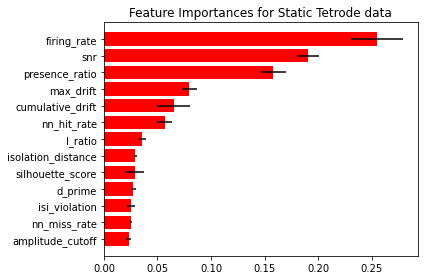

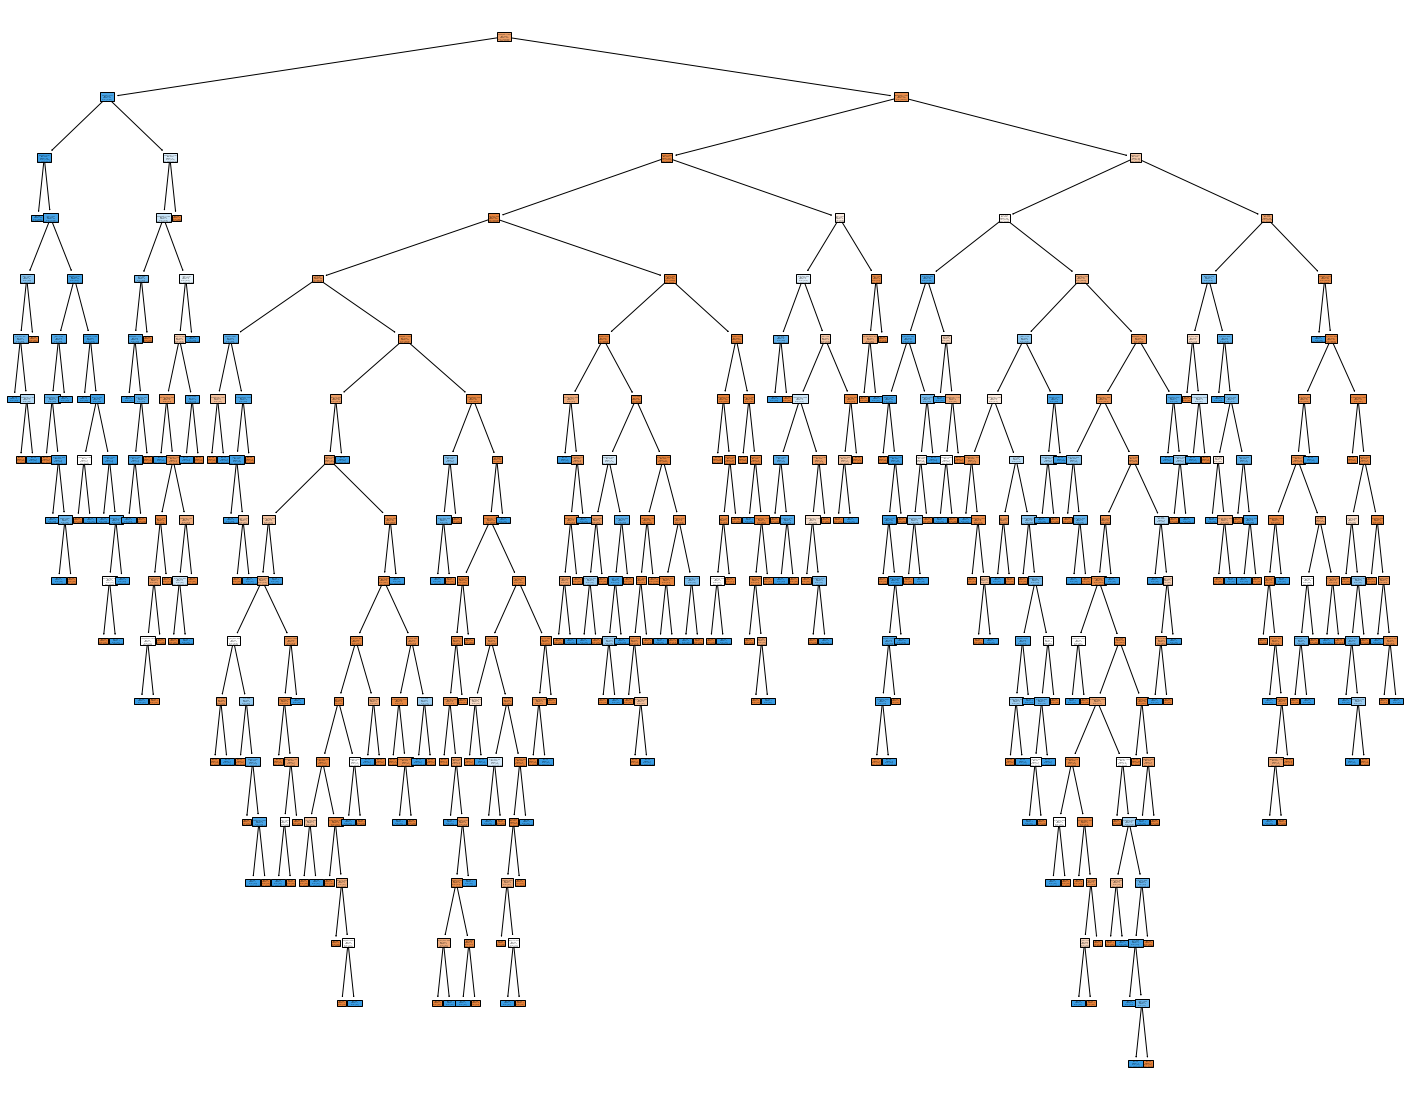

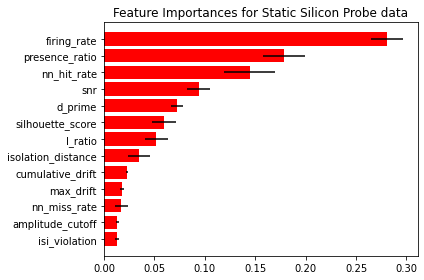

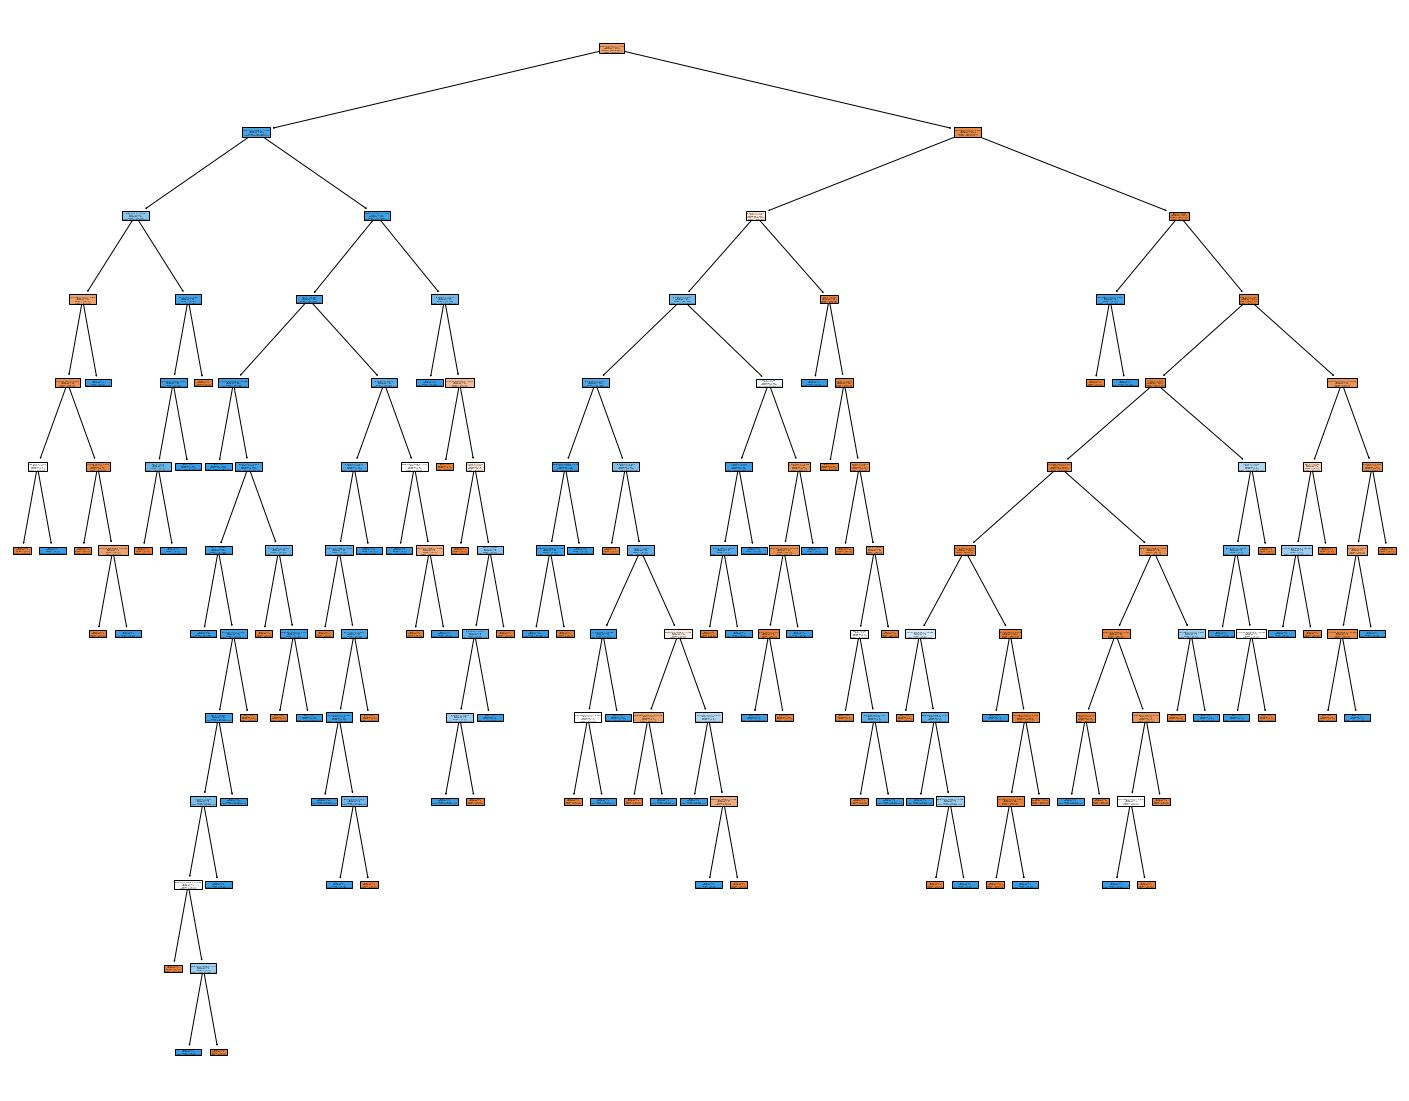

In [4]:
# Displays the ranked feature importances of the best performing random forest,
# showing the standard deviation of importances over the 5 folds as error bars
# Also displays the first decision tree from within the best performing forest.

X_train_static_tetrode, X_test_static_tetrode, y_train_static_tetrode, y_test_static_tetrode = train_test_split(static_tetrode_metric_data.drop(columns=['fp']),
                                                    static_tetrode_metric_data['fp'], test_size=0.2, random_state=RANDOM_STATE)


X_train_static_siprobe, X_test_static_siprobe, y_train_static_siprobe, y_test_static_siprobe = train_test_split(static_siprobe_metric_data.drop(columns=['fp']),
                                                    static_siprobe_metric_data['fp'], test_size=0.2, random_state=RANDOM_STATE)


rfc_feature_importance_analysis(
    X_train=X_train_static_tetrode, y_train= y_train_static_tetrode,
    X_test=X_test_static_tetrode, y_test=y_test_static_tetrode,
    metric_names=METRIC_NAMES, fig_title='Feature Importances for Static Tetrode data',
    feature_importance_output='/home/mclancy/truespikes/figures/feature_selection/feature_importance/static_tetrode_feature_importances.pdf',
    tree_output='/home/mclancy/truespikes/figures/feature_selection/feature_importance/static_tetrode_tree_sample.pdf'
)

rfc_feature_importance_analysis(
    X_train=X_train_static_siprobe, y_train=y_train_static_siprobe,
    X_test=X_test_static_siprobe, y_test=y_test_static_siprobe,
    metric_names=METRIC_NAMES, fig_title='Feature Importances for Static Silicon Probe data',
    feature_importance_output='/home/mclancy/truespikes/figures/feature_selection/feature_importance/static_siprobe_feature_importances.pdf',
    tree_output='/home/mclancy/truespikes/figures/feature_selection/feature_importance/static_siprobe_tree_sample.pdf'
)

/home/mclancy/truespikes/plotting.py:33: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  dataset[(
/home/mclancy/truespikes/plotting.py:33: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  dataset[(


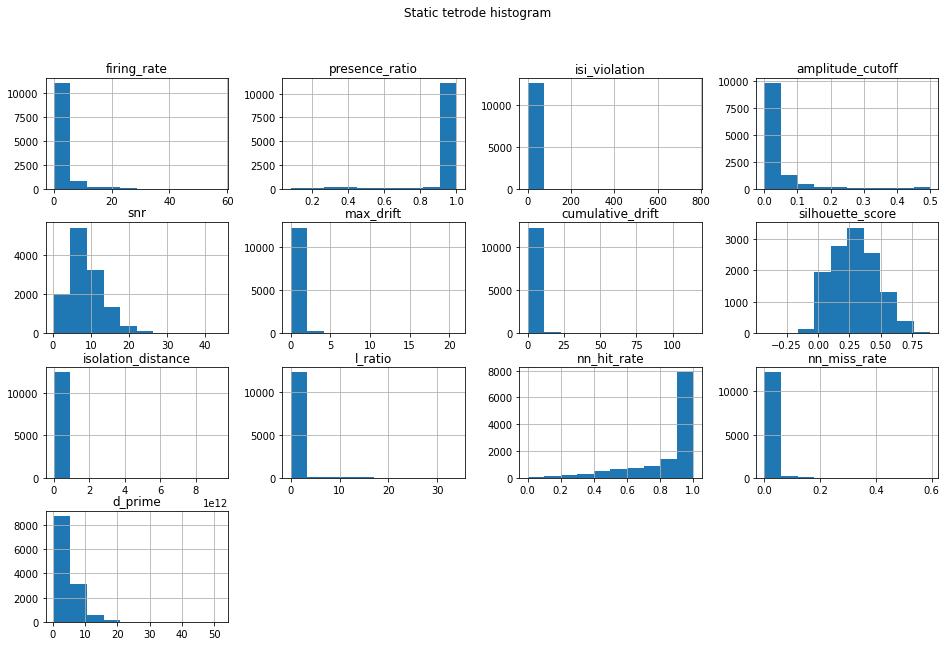

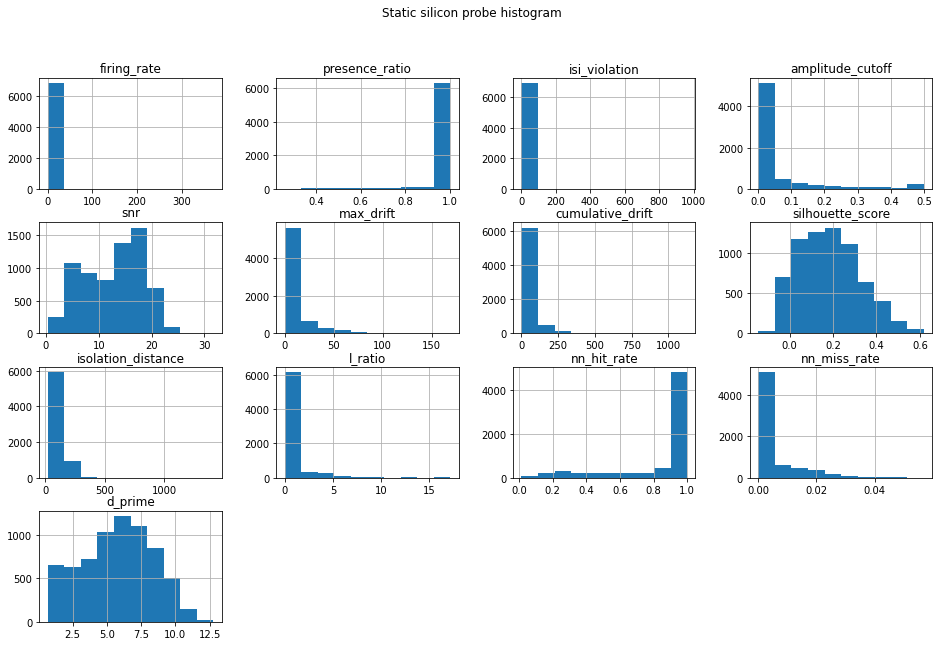

In [5]:
# Displays the histograms of metrics inside silicon probe and tetrode datasets.
plot_feature_histograms(
    static_tetrode_metric_data, figsize=(16,10), title='Static tetrode histogram',
    fig_out='/home/mclancy/truespikes/figures/feature_selection/metric_description/static_tetrode_metric_histograms.pdf'
)

plot_feature_histograms(
    static_siprobe_metric_data, figsize=(16,10), title='Static silicon probe histogram',
    fig_out='/home/mclancy/truespikes/figures/feature_selection/metric_description/static_siprobe_metric_histograms.pdf'
)

/home/mclancy/truespikes/plotting.py:33: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  dataset[(
/home/mclancy/truespikes/plotting.py:33: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  dataset[(


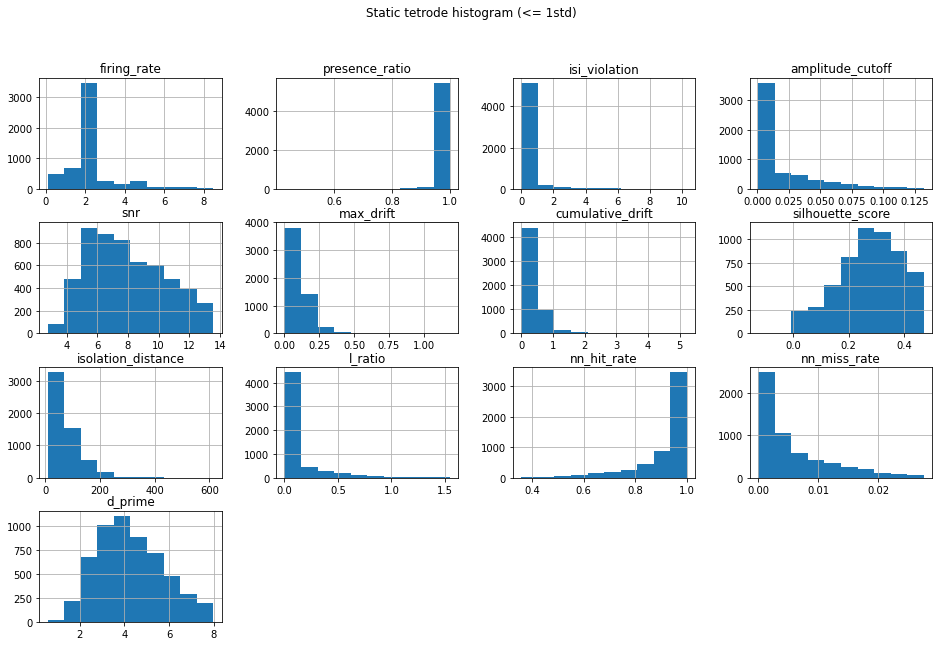

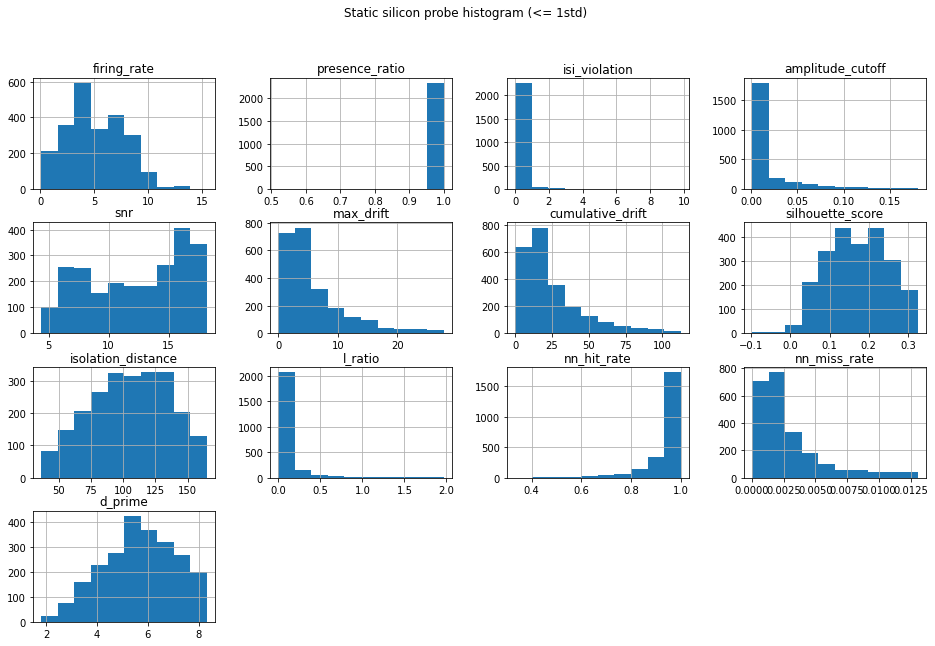

In [6]:
# As can be seen, there are some outliers making the interpretation of the histograms difficult.
# We can filter out metrics over a certain number of deviations to get a better view of the metric distributions.
plot_feature_histograms(
    static_tetrode_metric_data, filter_by_n_deviations=1, figsize=(16,10), title='Static tetrode histogram (<= 1std)',
    fig_out='/home/mclancy/truespikes/figures/feature_selection/metric_description/static_tetrode_metric_histograms_1std.pdf')

plot_feature_histograms(
    static_siprobe_metric_data, filter_by_n_deviations=1, figsize=(16,10), title='Static silicon probe histogram (<= 1std)',
    fig_out='/home/mclancy/truespikes/figures/feature_selection/metric_description/static_siprobe_metric_histograms_3std.pdf')

<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


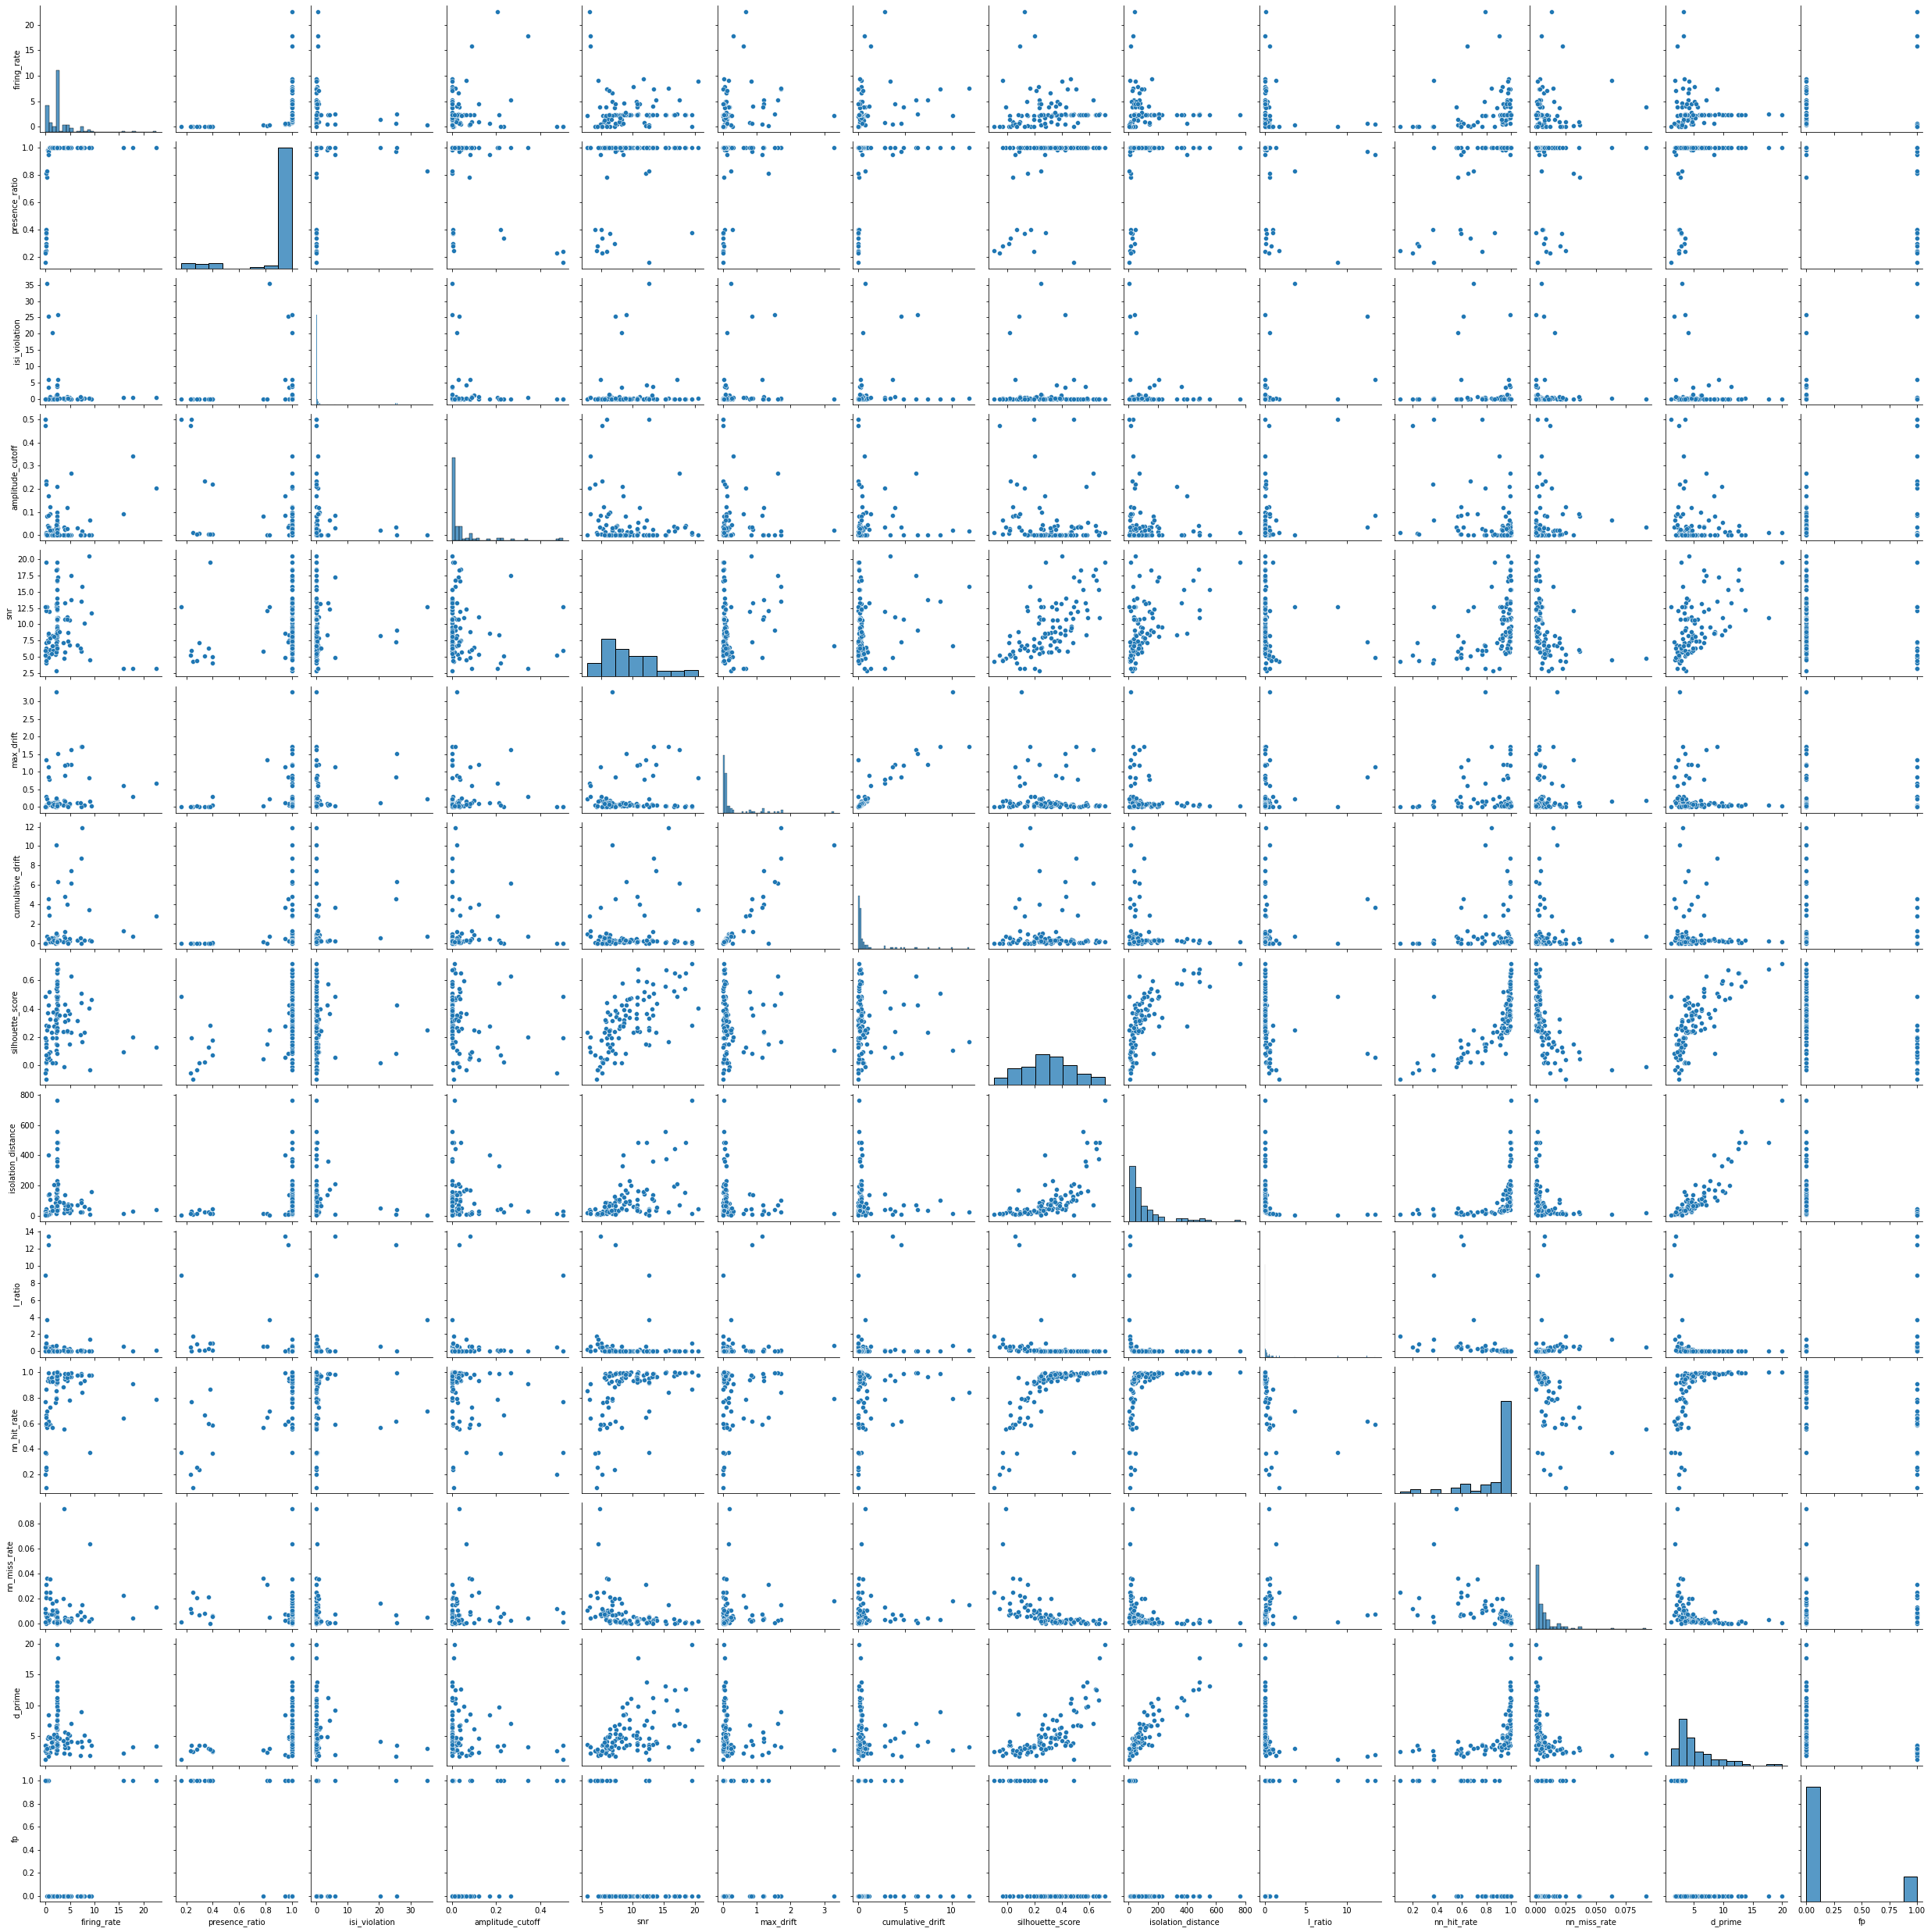

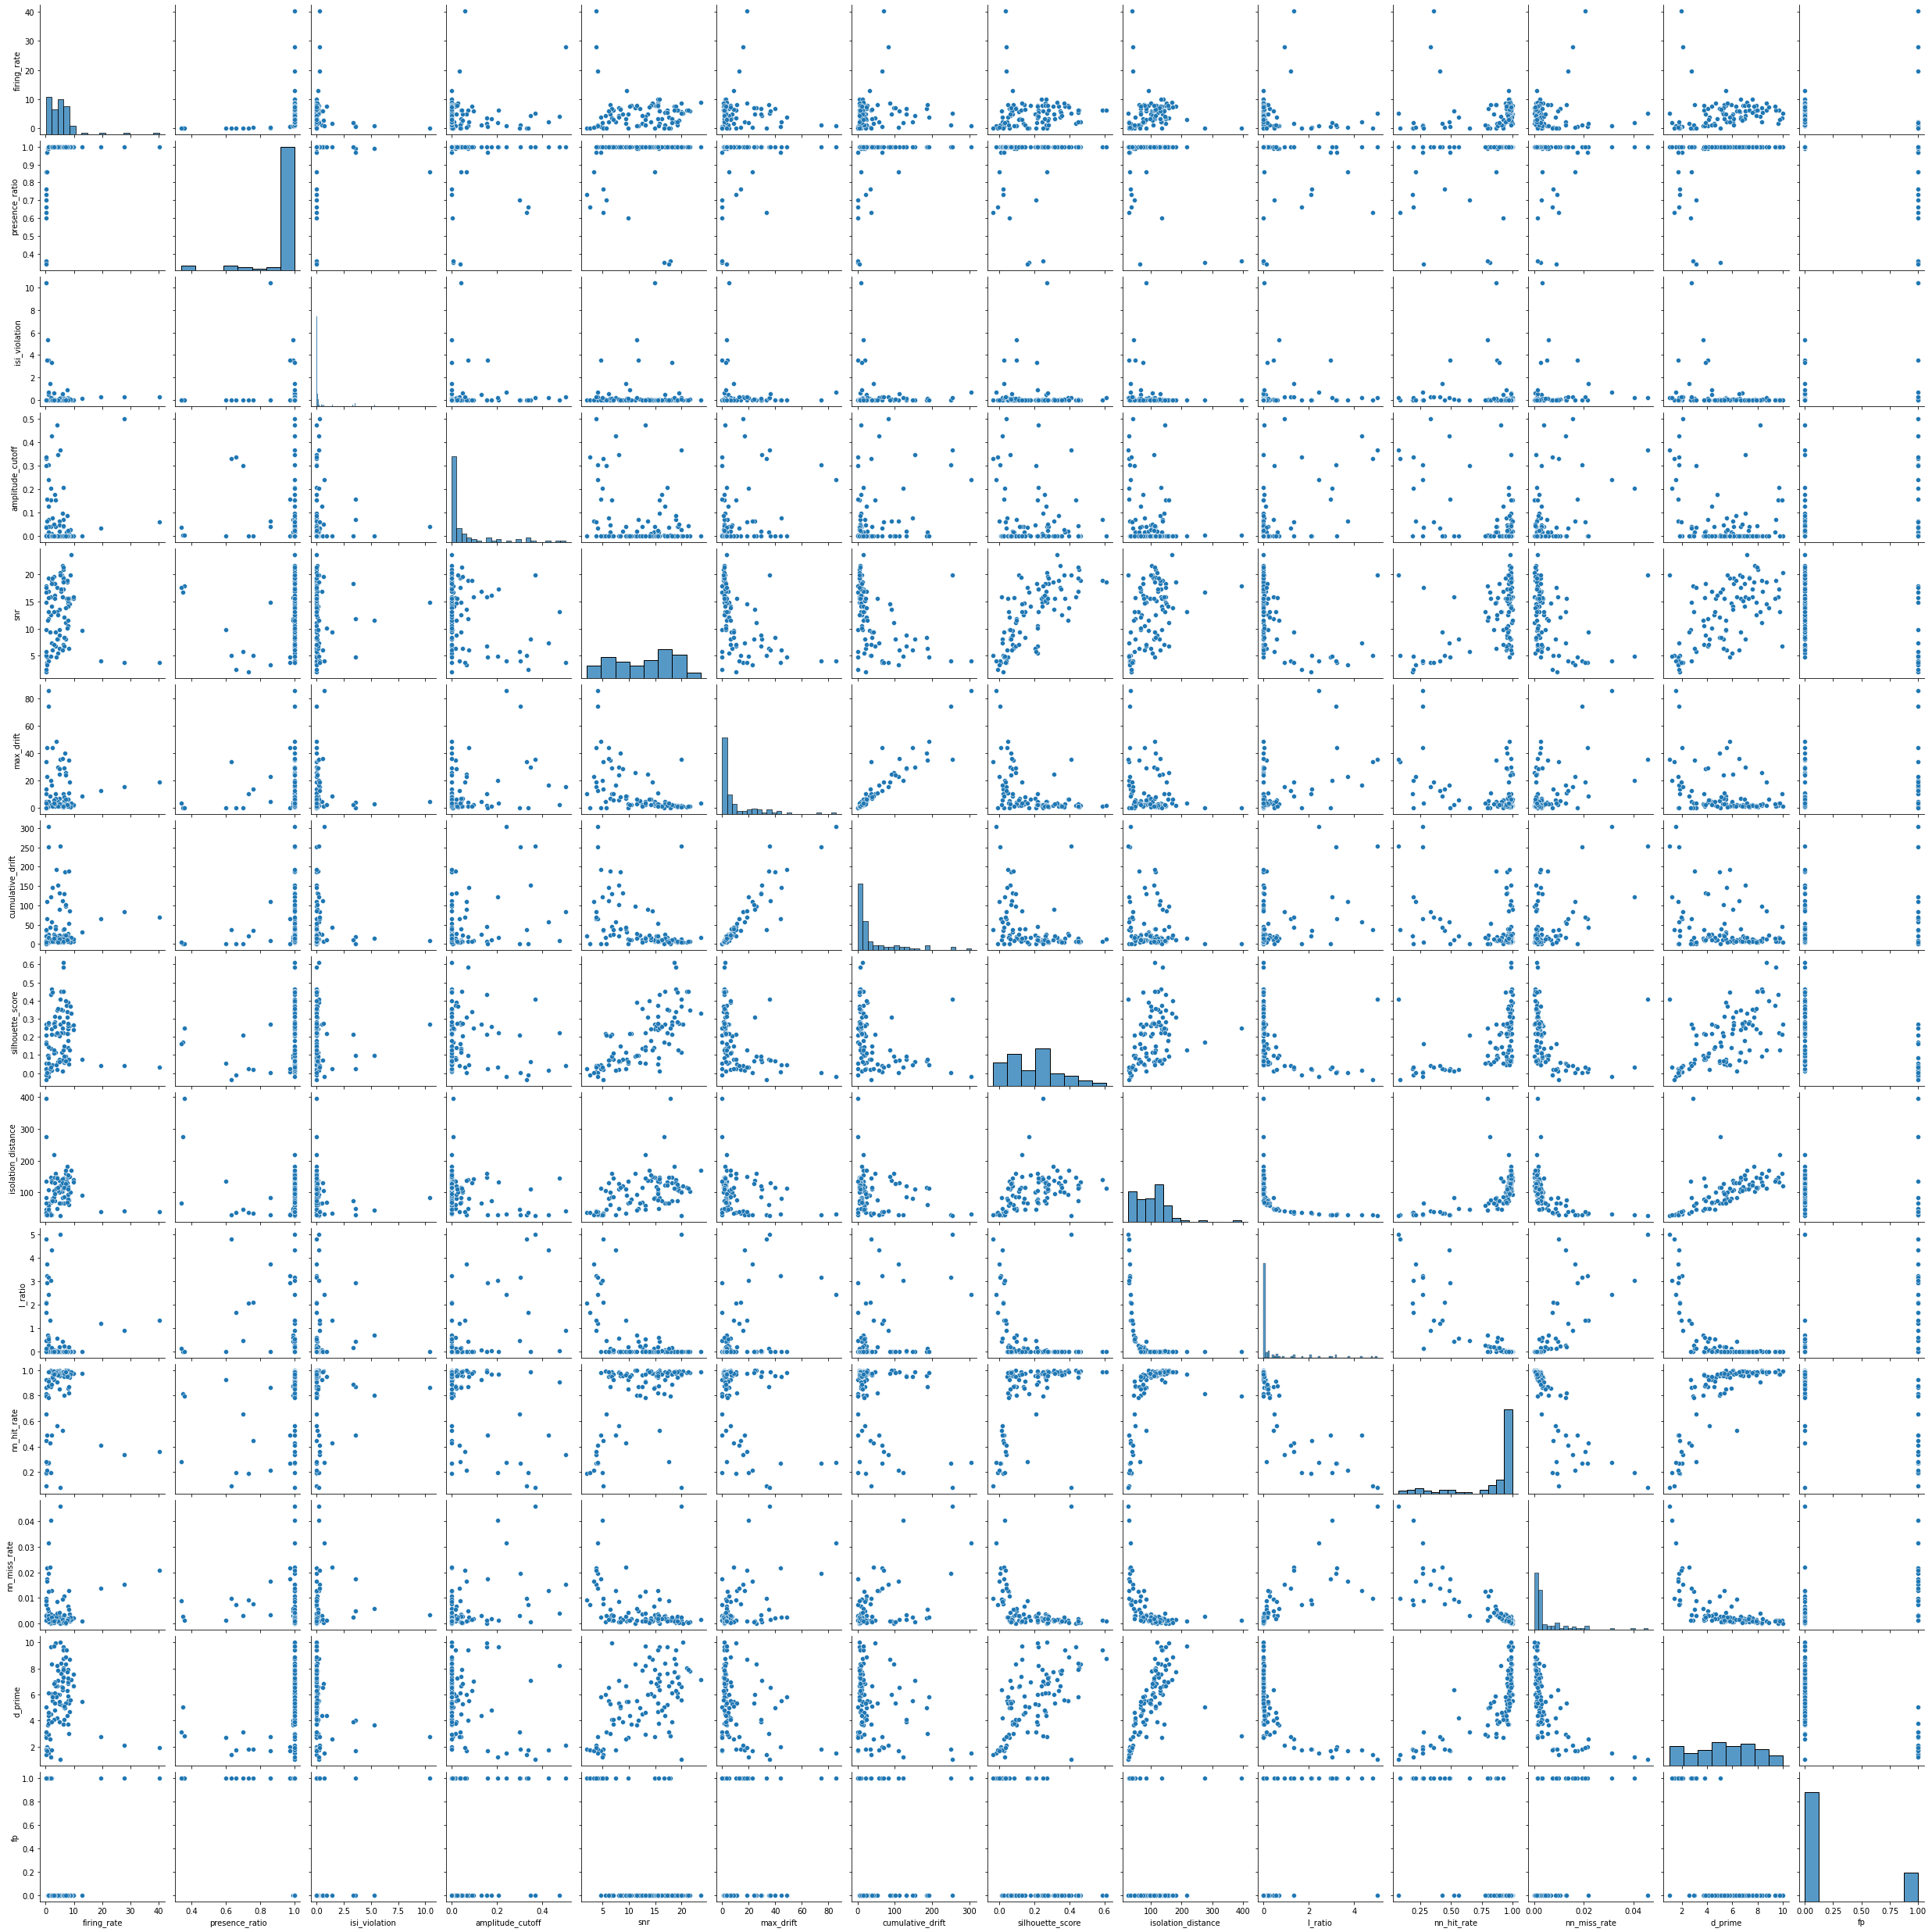

In [7]:
# Displays pair plots for 100 samples between metrics for silicon probe and tetrode datasets

import seaborn as sns
sns.pairplot(static_tetrode_metric_data.sample(n=100), height=2.5).savefig('/home/mclancy/truespikes/figures/feature_selection/metric_description/static_tetrode_metric_100n_pair_plot.pdf')
sns.pairplot(static_siprobe_metric_data.sample(n=100), height=2.5).savefig('/home/mclancy/truespikes/figures/feature_selection/metric_description/static_siprobe_metric_100n_pair_plot.pdf')

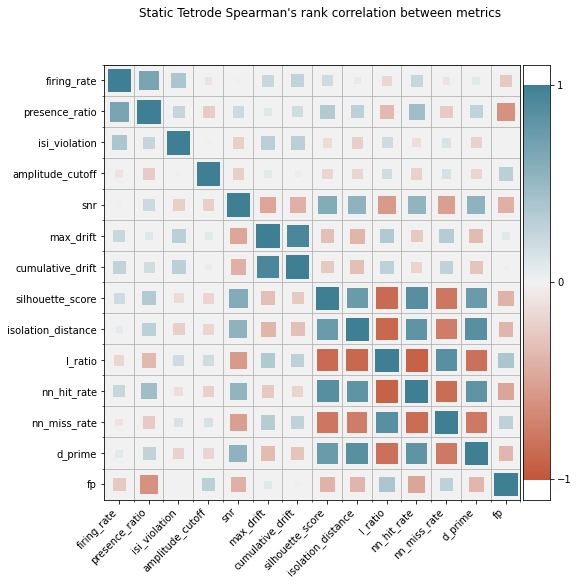

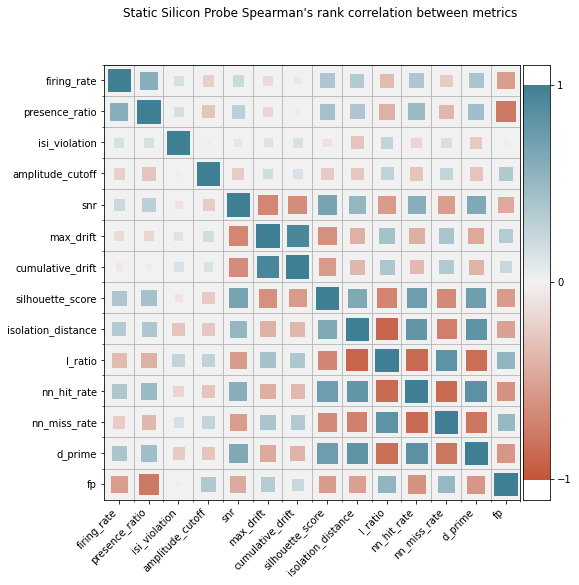

In [8]:
import matplotlib.pyplot as plt
from heatmap import corrplot

plt.figure(figsize=(8,8))
corrplot(static_tetrode_metric_data.corr(method='spearman'))
plt.suptitle('Static Tetrode Spearman\'s rank correlation between metrics')
plt.savefig('/home/mclancy/truespikes/figures/feature_selection/metric_description/static_tetrode_metric_spearman_correlation.pdf')


plt.figure(figsize=(8,8))
corrplot(static_siprobe_metric_data.corr(method='spearman'))
plt.suptitle('Static Silicon Probe Spearman\'s rank correlation between metrics')
plt.savefig('/home/mclancy/truespikes/figures/feature_selection/metric_description/static_siprobe_metric_spearman_correlation.pdf')

